## Importing Necessary Libraries


In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading Data

In [206]:
df = pd.read_csv("self practice\Salary_dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\suees\AppData\Local\Temp\ipykernel_3108\3197404894.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("self practice\Salary_dataset.csv")


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## Removing the Non - Useful Column from Data


In [207]:
df = df[["YearsExperience","Salary"]]
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


## Visualizing Data

<Axes: xlabel='YearsExperience', ylabel='Salary'>

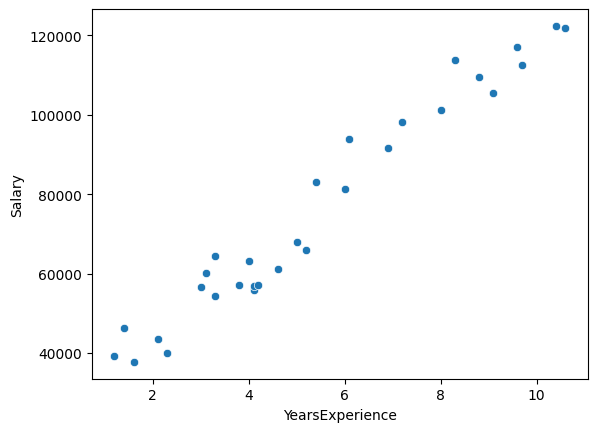

In [208]:
sns.scatterplot(df,x="YearsExperience",y="Salary")

## Splitting The Data

In [209]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df["YearsExperience"],df["Salary"],test_size=0.25,random_state=33)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((22,), (22,), (8,), (8,))

## Making Our Model (Using ordinary least square)

In [ ]:
class OLS:
    def __init__(self):
        self.m = None
        self.b = None

    def train(self,x_train,y_train):
        x_train = np.array(x_train)
        y_train = np.array(y_train)

        self.m,self.b = 0,0 
        num = 0
        den = 0 

        for i in range(x_train.shape[0]):
            num =num+ (np.average(x_train)-x_train[i])*(np.average(y_train)-y_train[i])
            den =den +(np.average(x_train)-x_train[i])**2

        self.m = num/den
        self.b = np.average(y_train) - self.m*np.average(x_train)
        return self.m,self.b


## Calling Our Class

In [ ]:

g = OLS()
m,b = g.train(x_train,y_train)

#using later to find metrics 
x =np.linspace(1,11,num=30)
y = m*x + b 
y_d = df["Salary"]
x_d = df["YearsExperience"]
y_m = np.average(x_d)*x  # mean line for thsi data set




## Visualizing the Work of Our Model

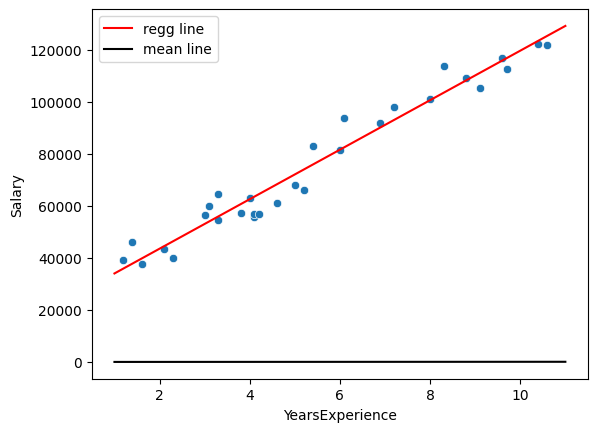

In [219]:
plt.plot(x,y,color = "red",label = "regg line")
plt.plot(x,y_m,color = "black",label = "mean line")

sns.scatterplot(df,x="YearsExperience",y="Salary")
plt.legend()

## Valuation Of Our Model

In [217]:
mse =0 
for i in range(x_train.shape[0]):
    mse = mse + (y_d[i] - y[i])
mse = mse**2/30

num=0
den = 0 
for i in range(x_train.shape[0]):
    num = num+y_d[i] - y[i]
    den = den+y_d[i] - y_m[i]
ratio = num/den
r2_score = 1-(ratio**2)
adjusted_r2 = 1 - (1-r2_score)*(30-1)/(30-2)
# as mse (mean squared error) 


np.float64(576026909.2932502)

In [218]:
print(f"The mean squared error for this model is {mse} and r2 score is {r2_score} and adjusted r2 score is {adjusted_r2}")


The mean squared error for this model is 576026909.2932502 and r2 score is 0.9908672812452123 and adjusted r2 score is 0.9905411127182556
